In [21]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [12]:
class_names = [
    '티셔츠/상의',   # 0
    '바지',         # 1
    '풀오버(스웨터)', # 2
    '드레스',       # 3
    '코트',         # 4
    '샌들',         # 5
    '셔츠',         # 6
    '운동화',       # 7
    '가방',         # 8
    '앵클 부츠'     # 9
]


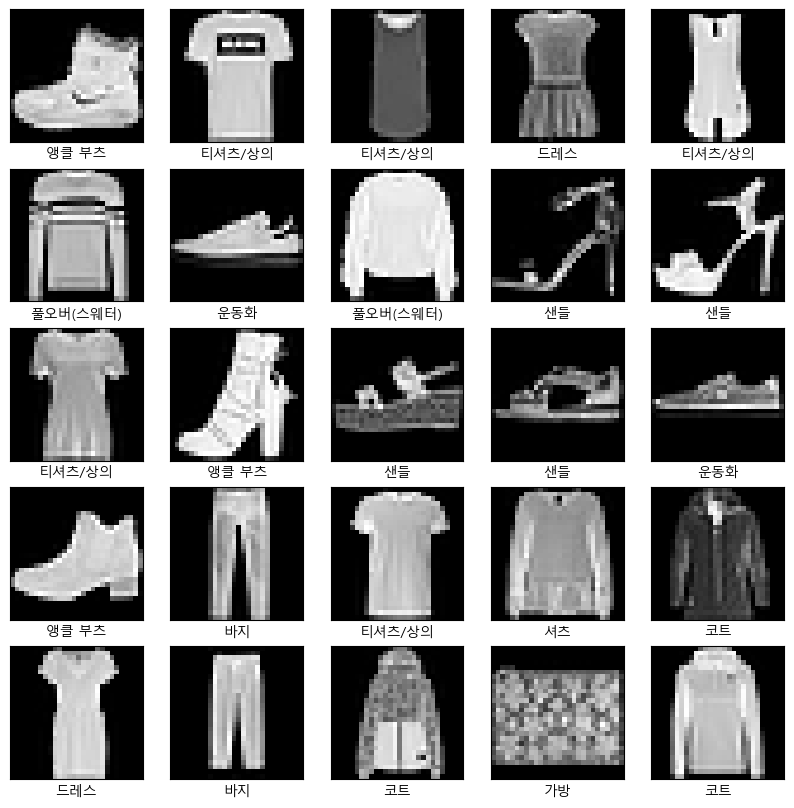

In [31]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()   

In [19]:
train_images.shape, train_labels.shape, test_images.shape, train_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [29]:
model.compile(
    optimizer='adam',                         # 최적화 알고리즘
    loss='sparse_categorical_crossentropy',   # 다중 클래스 분류용 손실 함수
    metrics=['accuracy']                      # 평가 지표
)

In [32]:
model.fit(
    train_images,         # 학습용 이미지
    train_labels,         # 학습용 레이블
    epochs=10,            # 반복 횟수
    batch_size=32,        # 미니배치 크기
    validation_split=0.2  # 학습 데이터 중 20%를 검증용으로 사용
)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2410 - accuracy: 0.9105 - val_loss: 0.3467 - val_accuracy: 0.8914
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2372 - accuracy: 0.9131 - val_loss: 0.3202 - val_accuracy: 0.8976
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2362 - accuracy: 0.9139 - val_loss: 0.3224 - val_accuracy: 0.8988
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2281 - accuracy: 0.9159 - val_loss: 0.3295 - val_accuracy: 0.8975
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2157 - accuracy: 0.9197 - val_loss: 0.3408 - val_accuracy: 0.8978
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2171 - accuracy: 0.9194 - val_loss: 0.3662 - val_accuracy: 0.8972
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2086 - accuracy: 0.9243 - val_loss: 0.3684 - val_accuracy:

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

# 1. 데이터 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0


(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

# 2. 실험할 하이퍼파라미터 조합 정의
filter_options = [32, 64]                   # Conv 필터 수
dense_units_options = [64, 128]             # Dense 뉴런 수
dropout_rate_options = [None, 0.1, 0.2, 0.3, 0.4, 0.5]  # Dropout 비율 (None은 사용 안 함)
hidden_layers_options = [1, 2]              # Conv 층 수
epoch_options = [5, 10, 20, 30]              # 학습 횟수
batch_size_options = [32, 64]                # 배치 사이즈

results = []  # 결과 저장 리스트

# 3. 모든 조합 반복
for filters in filter_options:
    for dense_units in dense_units_options:
        for dropout_rate in dropout_rate_options:
            for hidden_layers in hidden_layers_options:
                for epochs in epoch_options:
                    for batch_size in batch_size_options:

                        clear_session()  # 세션 초기화 (메모리 관리)

                        # 모델 구성
                        model = Sequential()
                        model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
                        model.add(MaxPooling2D(2))

                        if hidden_layers == 2:
                            model.add(Conv2D(filters * 2, (3, 3), activation='relu'))
                            model.add(MaxPooling2D(2))

                        model.add(Flatten())
                        model.add(Dense(dense_units, activation='relu'))

                        # Dropout 비율이 지정된 경우에만 추가
                        if dropout_rate is not None:
                            model.add(Dropout(dropout_rate))

                        model.add(Dense(10, activation='softmax'))

                        # 컴파일
                        model.compile(
                                    optimizer='adam',
                                    loss='sparse_categorical_crossentropy',
                                    metrics=['accuracy']
                                )

                        # 학습
                        history = model.fit(train_images, train_labels,
                                            epochs=epochs,
                                            batch_size=batch_size,
                                            validation_split=0.2,
                                            verbose=0)

                        
                        val_acc = history.history['val_accuracy'][-1]
                        print("검증용 정확도:", val_acc )
                        _, test_acc = model.evaluate(test_images, test_labels, verbose=0)

                        # 결과 저장
                        results.append({
                            'filters': filters,
                            'dense_units': dense_units,
                            'dropout_rate': dropout_rate,
                            'hidden_layers': hidden_layers,
                            'epochs': epochs,
                            'batch_size': batch_size,
                            'val_accuracy': val_acc,
                            'test_accuracy': test_acc
                        })

# 4. test_accuracy 기준 정렬
results.sort(key=lambda x: x['test_accuracy'], reverse=True)

# 5. 최고 성능 조합 출력
print("가장 높은 테스트 정확도 조합:")
print(results[0])








검증용 정확도: 0.8939999938011169
검증용 정확도: 0.8843333125114441
검증용 정확도: 0.8930000066757202
검증용 정확도: 0.8878333568572998
검증용 정확도: 0.8891666531562805
검증용 정확도: 0.8914999961853027
검증용 정확도: 0.8855833411216736
검증용 정확도: 0.8926666378974915
검증용 정확도: 0.8900833129882812
검증용 정확도: 0.8912500143051147
검증용 정확도: 0.887666642665863
검증용 정확도: 0.8966666460037231
검증용 정확도: 0.8930000066757202
검증용 정확도: 0.8913333415985107
검증용 정확도: 0.8893333077430725
검증용 정확도: 0.8946666717529297
검증용 정확도: 0.8900833129882812
검증용 정확도: 0.8814166784286499
검증용 정확도: 0.8843333125114441
검증용 정확도: 0.893833339214325
검증용 정확도: 0.8897500038146973
검증용 정확도: 0.8941666483879089
검증용 정확도: 0.893583357334137
검증용 정확도: 0.8959166407585144
검증용 정확도: 0.8886666893959045
검증용 정확도: 0.8959166407585144
검증용 정확도: 0.8880000114440918
검증용 정확도: 0.8973333239555359
검증용 정확도: 0.8932499885559082
검증용 정확도: 0.9005833268165588
검증용 정확도: 0.8989166617393494
검증용 정확도: 0.9003333449363708
검증용 정확도: 0.8850833177566528
검증용 정확도: 0.8806666731834412
검증용 정확도: 0.8943333625793457
검증용 정확도: 0.893249

KeyboardInterrupt: 